In [1]:
### read the user timeline data ..
## check the decline or rise of juul data per month
## same for marijuana..

In [2]:
import pandas as pd
import numpy as np
import os
import git
import ast
import matplotlib.pyplot as plt
import networkx as nx

In [3]:
def get_git_root(path):
    git_repo = git.Repo(path, search_parent_directories=True)
    git_root = git_repo.git.rev_parse("--show-toplevel")
    return git_root

In [4]:
Juul_list = set(['JUUL','juulvapor','juulnation','doit4juul'])

In [5]:
def literal_return(val):
    try:
        return ast.literal_eval(val)
    except ValueError:
        return (val)

In [6]:
def check_inlist(val):
    if (type(val) == str):
        val = ast.literal_eval(val)
        if (val != None):
            a, b =  map(set, [map(str.lower, val), map(str.lower, Juul_list)])
            if len(a & b) >= 1:
                return True
            else:
                return False

In [7]:
hexagon_path = os.path.join(get_git_root(os.getcwd()),"input","hexagonData.csv")

In [8]:
user_timeline = pd.read_csv(hexagon_path,lineterminator="\n")

In [9]:
len(user_timeline)

12516

In [109]:
# so everyone of the tweets extracted from hexagon api have juul in the tweets
len(user_timeline[user_timeline['hashtags'].apply(check_inlist) == True])

12443

In [114]:
# converting to datetime before grouping
user_timeline['tweetCreatedAt'] = pd.to_datetime(user_timeline['tweetCreatedAt'])

In [126]:
user_timeline.sort_values(by='tweetCreatedAt',inplace=True)

In [129]:
## group by tweetCreated at by month
user_timeline.set_index('tweetCreatedAt',inplace=True,drop=True)

In [250]:
len(user_timeline)

12516

In [170]:
# tweets = user_timeline.groupby(by=[user_timeline.index.year,user_timeline.index.month])['tweetId'].agg('count')
tweets = user_timeline.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

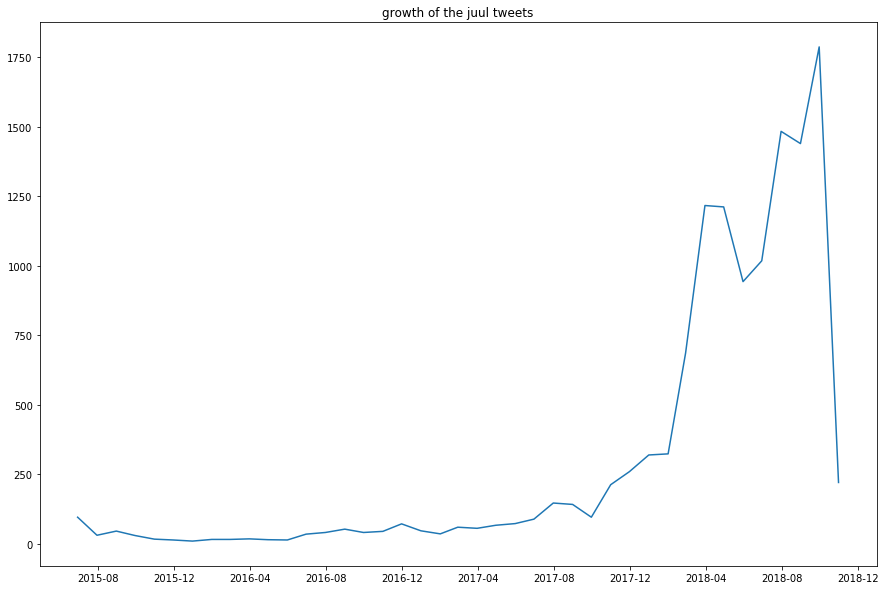

In [281]:
# plot the dataset
plt.figure(figsize=(15,10))
plt.plot(tweets.index,tweets.values)
plt.title("growth of the juul tweets")
plt.show()

In [184]:
## usign the same dataset to get the marijuana tweets
## read the weed words pattern
weed_df = pd.read_excel("/Users/akshayuppal/Desktop/thesis/backup_stuff/Weed_words.xlsx")

In [266]:
weed_words =  [str(" " + ele + " ") for ele in list(weed_df.weed)]
pattern_weed = "|".join(weed_words)

In [207]:
weed_tweets = user_timeline.loc[user_timeline['tweetText'].str.contains(pattern_weed) == True]

In [208]:
# tweets = user_timeline.groupby(by=[user_timeline.index.year,user_timeline.index.month])['tweetId'].agg('count')
weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

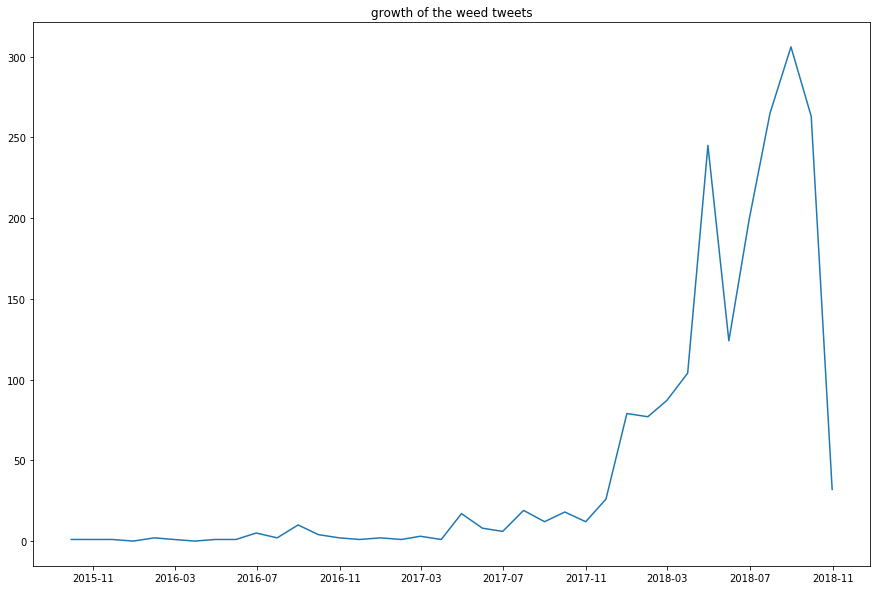

In [214]:
## rise of weed tweets over time
plt.figure(figsize=(15,10))
plt.plot(weeds.index,weeds.values)
plt.title("growth of the weed tweets")
plt.show()

In [252]:
# importing the user timeline with 200 tweets
timeline_user = pd.read_csv("/Users/akshayuppal/Desktop/thesis/twitter_juul/input/userTimelineData.csv",lineterminator="\n")


In [253]:
juul_tweet_pattern = "|".join(Juul_list)

In [254]:
## find all of the juul_tweets
juul_tweets = timeline_user.loc[timeline_user['tweetText'].str.contains(juul_tweet_pattern)]

In [256]:
## total of the juul tweets from the timelines
len(juul_tweets)

5173

In [257]:
# converting to datetime before grouping
juul_tweets['tweetCreatedAt'] = pd.to_datetime(juul_tweets['tweetCreatedAt'])
juul_tweets.sort_values(by='tweetCreatedAt',inplace=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [245]:
## group by tweetCreated at by month
juul_tweets.set_index('tweetCreatedAt',inplace=True,drop=True)
tweets_juul = juul_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

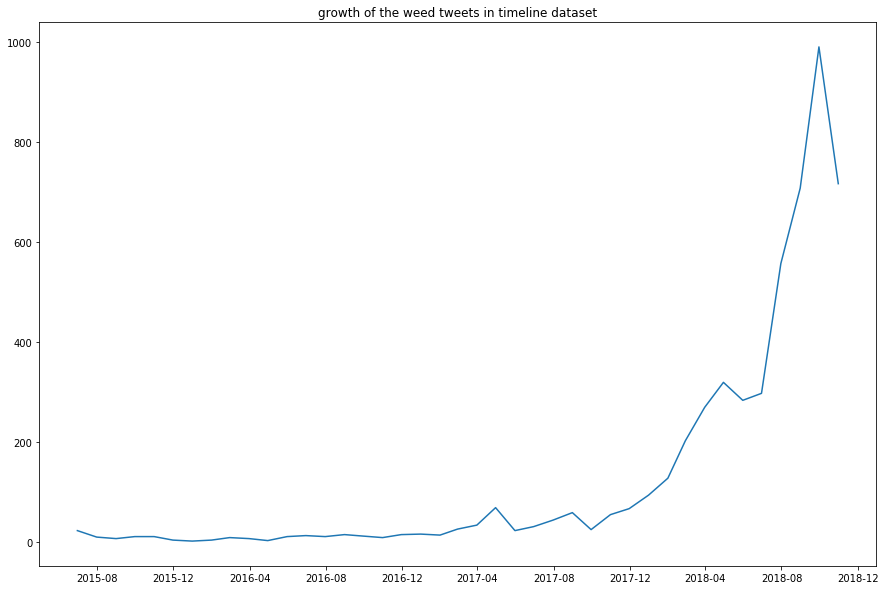

In [259]:
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweets_juul.index,tweets_juul.values)
plt.title("growth of the juul tweets in timeline dataset")
plt.show()

In [275]:
# find all of the weed tweets
weed_tweets = timeline_user.loc[timeline_user['tweetText'].str.contains(pattern_weed)]

In [277]:
weed_tweets['tweetCreatedAt'] = pd.to_datetime(weed_tweets['tweetCreatedAt'])

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [278]:
## group by tweetCreated at by month
weed_tweets.set_index('tweetCreatedAt',inplace=True,drop=True)
tweet_weeds = weed_tweets.groupby(pd.Grouper(freq='M'))['tweetId'].agg('count')

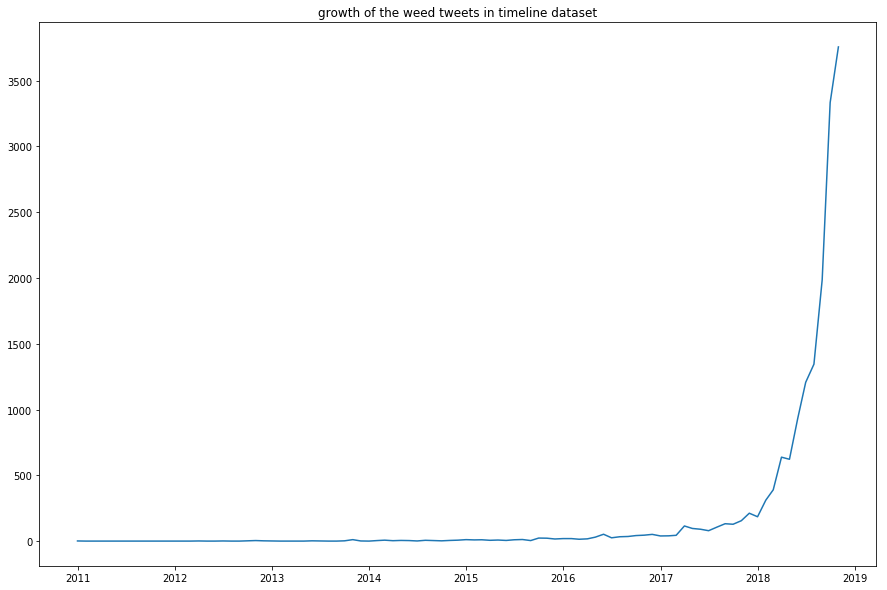

In [280]:
## rise of weed tweets over time ..cotains 200 tweets per user
plt.figure(figsize=(15,10))
plt.plot(tweet_weeds.index,tweet_weeds.values)
plt.title("growth of the weed tweets in timeline dataset")
plt.show()

In [10]:
def create_retweet_edgelist(source_node,user_list,filename):
    with open(filename,"w+") as f: 
        for user in tqdm(user_list):
            apis.rotate(-1)
            api = apis[0]
            if (user != source_node):
                try:
                    relation_obj = api.show_friendship(source_id = int(source_node), target_id = (user))[0]
                    if (relation_obj.following == True):
                        f.write(str(source_node) + " " + str(user)+"\n")
                    if (relation_obj.followed_by == True):
                        f.write(str(user) + " " + str(source_node)+"\n")
                except tweepy.TweepError as e:
                    continue

In [11]:
## need to look at cascade the large cascade..
hexagon_data = pd.read_csv(hexagon_path,lineterminator="\n")

In [290]:
cascade1 = (hexagon_data.loc[hexagon_data['retweetCount'] ==781])

In [294]:
cascade1.sort_values(by='tweetCreatedAt',inplace=True)

/Users/akshayuppal/anaconda3/envs/juul/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [311]:
# getting the first node the sorted list
tattoo_node = cascade1.head(1)['userID'].values[0]

In [298]:
create_retweet_edgelist(tattoo_node,user_tattoo,'tattoo.edgelist')

598

### api